In [4]:
!pip install geopy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from politician_function import shortest_route
from politician_function import calculate_route_distance
from politician_function import calculate_group_center
#from politician_function import cities_define
from politician_function import points_graph
from politician_function import final_path_graph
import pandas as pd

Environment Setting

In [8]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [22]:
def cities_define(path):
    # Setting the display size
    pd.set_option('display.width', 300)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    # Define the coordinates of the cities
    cities = pd.read_csv(path)

    # Assuming there are 'Latitude' and 'Longitude' columns in your cities DataFrame
    cities['Coordinates'] = list(zip(cities['latitude_deg'], cities['longitude_deg']))

    # Define the coordinates for the start and end cities
    start_city_coords = cities.loc[cities['airport_code'] == 'JFK', 'Coordinates'].iloc[0]
    end_city_coords = cities.loc[cities['airport_code'] == 'LAX', 'Coordinates'].iloc[0]  # Adjust based on your data representation
    # Note: Ensure the representation of Washington, D.C. matches your dataset
    # Generating a list of coordinates for other cities
    exclude_cities_coords = [start_city_coords, end_city_coords]
    other_cities_coords = cities[~cities['Coordinates'].isin(exclude_cities_coords)]['Coordinates'].tolist()

    return cities, cities['Coordinates'], start_city_coords, end_city_coords, exclude_cities_coords, other_cities_coords

In [24]:
cities, cities['Coordinates'], start_city_coords, end_city_coords, exclude_cities_coords, other_cities_coords = cities_define('airports.csv')

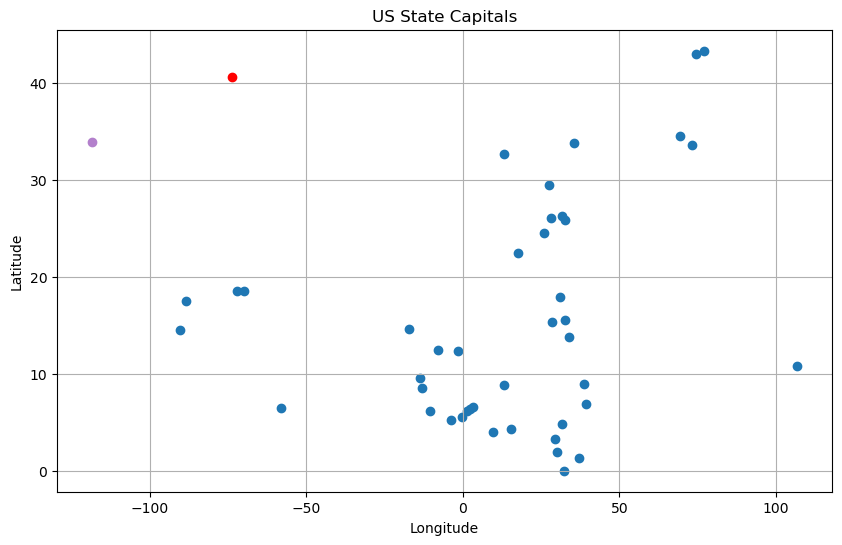

In [26]:
graph = points_graph(start_city_coords, end_city_coords, other_cities_coords)
plt.show()

Use kmeans to separate rest 49 states in 10 groups

In [ ]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init = 10).fit(cities[['Latitude', 'Longitude']])
cities['Cluster'] = kmeans.labels_

Define different colors for different states

In [ ]:
colors = ['yellow', 'green', 'blue', 'cyan', 'magenta', (0.1, 0.2, 0.5), 'black', 'orange', 'purple', 'brown']
for cluster in cities['Cluster'].unique():
    # Choose the clusters
    cluster_data = cities[cities['Cluster'] == cluster]
    # Set different color for different cluster
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}', color=colors[cluster])

Plot setting

In [ ]:
plt.title('US State Capitals Clustered')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

Calculate the shortest path within clusters

In [ ]:
for cluster in range(n_clusters):
    cluster_cities_coords = cities[cities['Cluster'] == cluster]['Coordinates'].tolist()
    if cluster_cities_coords:  # Check if there are cities in the cluster
        route, distance = shortest_route(cluster_cities_coords)
        exec(f'group_{cluster} = {route}')
        exec(f'distance_{cluster} = {distance}')

Define 10 clusters in 10 groups

In [ ]:
groups = {
    'group_1': group_0,
    'group_2': group_1,
    'group_3': group_2,
    'group_4': group_3,
    'group_5': group_4,
    'group_6': group_5,
    'group_7': group_6,
    'group_8': group_7,
    'group_9': group_8,
    'group_10': group_9
}

Reverse Longitude and Latitude to plot

In [ ]:
groups_plot = {}
for group, coords in groups.items():
    groups_plot[group] = [(longitude, latitude) for latitude, longitude in coords]

Plot path for every cluster

In [ ]:
plt.figure(figsize=(10, 8))
labels = [key for key in groups_plot.keys()]
arrow_patches = []
for (group, coords), color in zip(groups_plot.items(), colors):
    for i in range(len(coords)-1):
        start = coords[i]
        end = coords[i+1]
        arrow = FancyArrowPatch(start, end, arrowstyle='-|>', color=color, mutation_scale=20)
        plt.gca().add_patch(arrow)
    arrow_patch = FancyArrowPatch((0, 0), (0, 0), color=color, arrowstyle='-|>', mutation_scale=20)
    arrow_patches.append(arrow_patch)

Plot setting

In [ ]:
plt.xlim(-130,-65)
plt.ylim(30,47.5)
plt.title('Path of Each Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(arrow_patches,labels)
plt.show()

Add center points into dictionary

In [ ]:
group_centers = {}
for group, coords in groups.items():
    # Center Calculate
    center = calculate_group_center(coords)
    group_centers[group] = center

Calculate the shortest path for center points which will represent the shortest path for each group

In [ ]:
route, distance = shortest_route(value for value in group_centers.values())
print(route)
print(distance)
# route = [(21.307442, -157.857376), (58.301598, -134.420212), (42.666524599999995, -120.67897779999998), (39.562175833333335, -108.62473933333332), (42.30993314285714, -96.05517257142859), (32.8834385, -97.6218455), (32.3453985, -88.10476299999999), (39.95559757142858, -86.34515157142857), (37.868266250000005, -78.07769875000001), (42.57538275, -72.198608625)]
# distance = 8050.998174199292

Convert coordinates to group num

In [ ]:
result_groups = []
for coord in route:
    for group, center in group_centers.items():
        if coord == center:
            result_groups.append(group)
            break

Define the total path

In [ ]:
total_path = [start_city_coords]
for group_key in result_groups:
    coords = groups[group_key]
    total_path.extend(coords)
total_path.append(end_city_coords)
print(total_path)

Calculate the total distance

In [ ]:
total_distance = calculate_route_distance(total_path)
print(total_distance)

Show the final path.

In [ ]:
path = [cities.loc[cities['Coordinates'] == coord, 'States'].iloc[0] for coord in total_path]
print(path)

Plot the path

In [ ]:
total_path_plot = final_path_graph(total_path)
plt.show()